In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
from datascience import *
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression, SGDRegressor, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

In [2]:
df = pd.read_csv('extracted_dataset.csv')
df

,Course Code,Course Title,Student Number,Department Code,Course Level,Letter Grade,Status,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year
0,UNI 113,Textual Analysis and Effective Com. I,351,IE,Undergraduate,A+,Successful,4.05,Freshman,18,30,4.050000,2.120833,2.703226,2010 - Fall,3,0,3,5,1
1,MGT 511,Küresel Yönetim Düşüncesi,1182,MBA/NT,Graduate,A-,Successful,3.54,Freshman,15,25,3.540000,3.576471,3.324211,2010 - Fall,3,0,3,5,5
2,MGT 521,Yönetim ve Organizasyon,1182,MBA/NT,Graduate,B+,Successful,3.54,Freshman,15,25,3.540000,3.371429,3.324211,2010 - Fall,3,0,3,5,5
3,MGT 521,Yönetim ve Organizasyon,1181,MBA/NT,Graduate,B+,Successful,3.38,Freshman,15,25,3.380000,3.371429,3.324211,2010 - Fall,3,0,3,5,5
4,MGT 531,Stratejik Yönetim,1181,MBA/NT,Graduate,B+,Successful,3.38,Freshman,15,25,3.380000,3.227273,3.324211,2010 - Fall,3,0,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49342,IE 451,Project Management,2003,EE,Undergraduate,B+,Successful,2.52,Junior,18,30,3.300000,2.673585,2.496850,2014 - Spring,3,0,3,5,4
49343,ENGR 251,Probability for Engineers,1311,EE,Undergraduate,A-,Successful,2.14,Sophomore,15,25,3.000000,2.206105,1.990188,2014 - Spring,3,0,3,5,2
49344,EE 321,Electromagnetics,2003,EE,Undergraduate,B,Successful,2.52,Junior,18,30,2.540000,2.278049,2.476489,2014 - Spring,3,0,3,5,3
49345,CTV 212,Editing,173,CTV,Undergraduate,C+,Successful,2.08,Sophomore,18,30,2.488889,2.693056,2.924132,2014 - Spring,3,0,3,5,2


In [3]:
grad_courses = []
for idx in df.index:
    if df.iloc[idx, 19] > 4:
        grad_courses.append(idx)
for row_index in grad_courses:
    df.drop(row_index, inplace=True)
df.index = range(len(df))
df

,Course Code,Course Title,Student Number,Department Code,Course Level,Letter Grade,Status,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year
0,UNI 113,Textual Analysis and Effective Com. I,351,IE,Undergraduate,A+,Successful,4.05,Freshman,18,30,4.050000,2.120833,2.703226,2010 - Fall,3,0,3,5,1
1,UNI 203,Understanding Science and Technology,240,SOC,Undergraduate,B,Successful,2.62,Freshman,18,30,2.616667,3.176000,2.703226,2010 - Fall,3,0,3,5,2
2,UNI 105,Understanding Society and Culture I,240,SOC,Undergraduate,A,Successful,2.62,Freshman,18,30,2.616667,3.211538,2.703226,2010 - Fall,3,0,3,5,1
3,UNI 107,World Civilizations& Global Encounters I,240,SOC,Undergraduate,A,Successful,2.62,Freshman,18,30,2.616667,2.986364,2.703226,2010 - Fall,3,0,3,5,1
4,UNI 111,Critical Reading & Writing in Turkish I,240,SOC,Undergraduate,F,Unsuccessful,2.62,Freshman,18,30,2.616667,2.113636,2.703226,2010 - Fall,3,0,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43699,IE 451,Project Management,2003,EE,Undergraduate,B+,Successful,2.52,Junior,18,30,3.300000,2.673585,2.496850,2014 - Spring,3,0,3,5,4
43700,ENGR 251,Probability for Engineers,1311,EE,Undergraduate,A-,Successful,2.14,Sophomore,15,25,3.000000,2.206105,1.990188,2014 - Spring,3,0,3,5,2
43701,EE 321,Electromagnetics,2003,EE,Undergraduate,B,Successful,2.52,Junior,18,30,2.540000,2.278049,2.476489,2014 - Spring,3,0,3,5,3
43702,CTV 212,Editing,173,CTV,Undergraduate,C+,Successful,2.08,Sophomore,18,30,2.488889,2.693056,2.924132,2014 - Spring,3,0,3,5,2


In [4]:
df.drop([df.columns[0], df.columns[1], df.columns[2]], inplace=True, axis=1)
df.head()

,Department Code,Course Level,Letter Grade,Status,GPA,Standing,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,Course Credit,ECTS,Course Year
0,IE,Undergraduate,A+,Successful,4.05,Freshman,18,30,4.050000,2.120833,2.703226,2010 - Fall,3,0,3,5,1
1,SOC,Undergraduate,B,Successful,2.62,Freshman,18,30,2.616667,3.176000,2.703226,2010 - Fall,3,0,3,5,2
2,SOC,Undergraduate,A,Successful,2.62,Freshman,18,30,2.616667,3.211538,2.703226,2010 - Fall,3,0,3,5,1
3,SOC,Undergraduate,A,Successful,2.62,Freshman,18,30,2.616667,2.986364,2.703226,2010 - Fall,3,0,3,5,1
4,SOC,Undergraduate,F,Unsuccessful,2.62,Freshman,18,30,2.616667,2.113636,2.703226,2010 - Fall,3,0,3,5,1


In [5]:
df = pd.concat([df, pd.get_dummies(df['Course Year'], prefix='Course Year'), pd.get_dummies(df['Department Code'], prefix='Department Code'), pd.get_dummies(df['Course Level'], prefix='Course Level'), pd.get_dummies(df['Standing'], prefix='Standing'), pd.get_dummies(df['Status'], prefix='Status')], axis=1)
df.drop(['Course Year', 'Department Code', 'Course Level', 'Status', 'Standing'], axis=1, inplace=True)
df

,Letter Grade,GPA,Completed Credits,Completed ECTS,GPA Student - Subject,Avg. Grade - Taken,Avg. Grade - Students_Subject,Semester,Theoritical,Practical,...,Department Code_İHP,Course Level_Graduate,Course Level_Undergraduate,Standing_Freshman,Standing_Junior,Standing_Senior,Standing_Sophomore,Status_Recorded,Status_Successful,Status_Unsuccessful
0,A+,4.05,18,30,4.050000,2.120833,2.703226,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
1,B,2.62,18,30,2.616667,3.176000,2.703226,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
2,A,2.62,18,30,2.616667,3.211538,2.703226,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
3,A,2.62,18,30,2.616667,2.986364,2.703226,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,1,0
4,F,2.62,18,30,2.616667,2.113636,2.703226,2010 - Fall,3,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43699,B+,2.52,18,30,3.300000,2.673585,2.496850,2014 - Spring,3,0,...,0,0,1,0,1,0,0,0,1,0
43700,A-,2.14,15,25,3.000000,2.206105,1.990188,2014 - Spring,3,0,...,0,0,1,0,0,0,1,0,1,0
43701,B,2.52,18,30,2.540000,2.278049,2.476489,2014 - Spring,3,0,...,0,0,1,0,1,0,0,0,1,0
43702,C+,2.08,18,30,2.488889,2.693056,2.924132,2014 - Spring,3,0,...,0,0,1,0,0,0,1,0,1,0


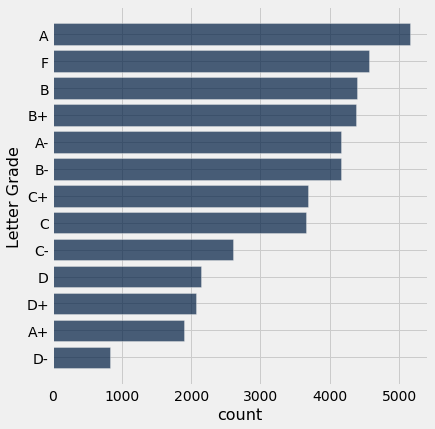

In [6]:
Table().with_column('Letter Grade', df['Letter Grade']).group(0).sort('count', descending=True).barh('Letter Grade')

In [7]:
columns = df.columns
columns

Index(['Letter Grade', 'GPA', 'Completed Credits', 'Completed ECTS',
       'GPA Student - Subject', 'Avg. Grade - Taken',
       'Avg. Grade - Students_Subject', 'Semester', 'Theoritical', 'Practical',
       'Course Credit', 'ECTS', 'Course Year_1', 'Course Year_2',
       'Course Year_3', 'Course Year_4', 'Department Code_CS',
       'Department Code_CTV', 'Department Code_CULT/T',
       'Department Code_ECE/NT', 'Department Code_ECE/T', 'Department Code_EE',
       'Department Code_HIST', 'Department Code_HIST PhD',
       'Department Code_HIST/T', 'Department Code_HUK', 'Department Code_IE',
       'Department Code_ISE/NT', 'Department Code_ISE/T',
       'Department Code_ISS', 'Department Code_ITM', 'Department Code_KHUK/T',
       'Department Code_LIT', 'Department Code_MGT', 'Department Code_MTS/T',
       'Department Code_PHIL', 'Department Code_POLS',
       'Department Code_POLS/NT', 'Department Code_POLS/T',
       'Department Code_PSY', 'Department Code_SOC', 'Department 

In [8]:
le = LabelEncoder()
le.fit(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F'])

LabelEncoder()

In [9]:
def get_train_data(df, train_sem, columns):
    dataFrame = pd.DataFrame(columns=columns)
    for sem in train_sem:
        dataFrame = pd.concat([dataFrame, df[df.iloc[:, 7] == sem]], ignore_index=True)
    for idx in dataFrame.index:
        semester = dataFrame.iloc[idx, 7]
        dataFrame.iloc[idx, 7] = semester.split()[2].strip()
    
    X_train = dataFrame.drop('Semester', axis=1)
    y_train = le.transform(X_train.pop('Letter Grade'))
    return X_train, y_train

In [10]:
def normalize_X(X):
    cols = X.columns
    sc = StandardScaler()
    X = sc.fit_transform(X)
    return pd.DataFrame(X, columns=cols)

In [11]:
def get_error_score(df, columns, model):
    error_scores = {}
    sorted_semesters = sorted(set(df.iloc[:, 7]))
    for sem_idx in range(1, len(sorted_semesters)):
        training_sem = sorted_semesters[:sem_idx]
        test_sem = sorted_semesters[sem_idx]
        X_train, y_train = get_train_data(df, training_sem, columns)
        X_test = df[df.iloc[:, 7] == test_sem]
        X_test.drop('Semester', axis=1, inplace=True)
        y_test = le.transform(X_test.pop('Letter Grade'))
        
        X_train = normalize_X(X_train)
        X_test = normalize_X(X_test)
        model.fit(X_train, y_train)
        
        y_pred_test = model.predict(X_test)
        mae_test = round(mean_absolute_error(y_test, y_pred_test), 3)
        mse_test = round(mean_squared_error(y_test, y_pred_test), 3)
        r2_test = round(r2_score(y_test, y_pred_test), 3)
        
        y_pred_train = model.predict(X_train)
        mae_train = round(mean_absolute_error(y_train, y_pred_train),3)
        mse_train = round(mean_squared_error(y_train, y_pred_train),3)
        r2_train = round(r2_score(y_train, y_pred_train),3)
        
        error_scores.setdefault(sem_idx, {})
        error_scores[sem_idx]['mae'] = [mae_train, mae_test]
        error_scores[sem_idx]['mse'] = [mse_train, mse_test]
        error_scores[sem_idx]['r2'] = [r2_train, r2_test]        
        
    return error_scores

In [12]:
def plot_error_score(df, columns, model):
    scores = get_error_score(df, columns, model)
    table = Table().with_column('Number of Training Semesters', scores.keys())
    error_scores = {}
    for k in sorted(scores):
        for metric in scores[k]:
            error_scores.setdefault(metric + ' train', [])
            error_scores[metric + ' train'].append(scores[k][metric][0])
            error_scores.setdefault(metric + ' test', [])
            error_scores[metric + ' test'].append(scores[k][metric][1])
    
    for model in error_scores:
        table = table.with_column(model, error_scores[model])

    table.plot('Number of Training Semesters')
    return table

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.602,12.254,3.743,437.47,0.745,-26.907
2,1.541,1.56,3.766,3.533,0.757,0.722
3,1.513,1.54505e+13,3.612,5.08328e+26,0.763,-3.83996e+25
4,1.632,3.01417e+12,4.421,2.75427e+25,0.68,-2.21376e+24
5,1.518,1.12649e+12,3.584,2.34296e+24,0.728,-1.92047e+23
6,1.663,2.28862e+13,4.564,1.63712e+27,0.652,-1.14679e+26
7,1.513,5.08529e+12,3.709,1.00187e+26,0.73,-7.17239e+24
8,1.469,9.18438e+11,3.405,2.1513e+24,0.753,-1.33906e+23
9,1.474,9.61599e+11,3.422,1.67803e+24,0.754,-1.22208e+23
10,1.469,7.89728e+11,3.41,1.1998e+24,0.754,-8.70947e+22


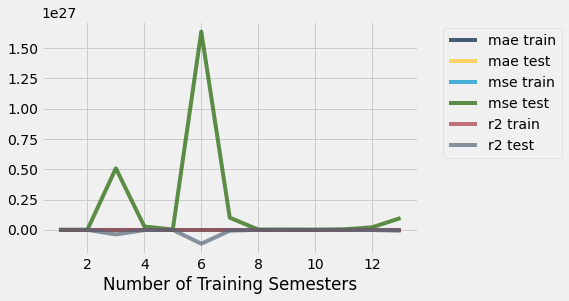

In [13]:
plot_error_score(df, columns, LinearRegression())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.597,1.737,3.802,4.941,0.741,0.685
2,1.545,1.591,3.783,3.695,0.756,0.709
3,1.518,1.604,3.631,3.994,0.761,0.698
4,1.479,1.504,3.429,3.578,0.752,0.712
5,1.476,1.423,3.408,3.023,0.741,0.752
6,1.467,1.52,3.363,3.713,0.743,0.74
7,1.458,1.497,3.359,3.518,0.755,0.748
8,1.469,1.681,3.406,4.223,0.753,0.737
9,1.474,1.479,3.422,3.475,0.754,0.747
10,1.469,1.51,3.41,3.671,0.754,0.733


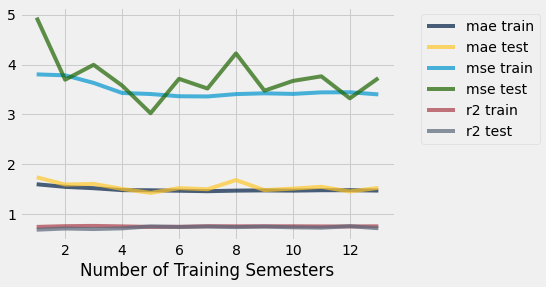

In [14]:
plot_error_score(df, columns, BayesianRidge())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.601,1.716,3.781,4.882,0.743,0.689
2,1.54,1.599,3.785,3.783,0.756,0.703
3,1.517,1.606,3.63,4.008,0.761,0.697
4,1.479,1.497,3.435,3.559,0.751,0.714
5,3.407,2.472,416.46,9.014,-30.646,0.261
6,2.692,6.091,2967.38,2941.3,-225.416,-205.035
7,1.464,1.506,3.389,3.556,0.753,0.745
8,2831.66,2846.75,1.86544e+09,6.42638e+07,-1.35054e+08,-4.00003e+06
9,2709.42,4216.64,7.47293e+09,7.54391e+09,-5.37655e+08,-5.49412e+08
10,316378,303269,6.63353e+13,5.51455e+13,-4.79178e+12,-4.00308e+12


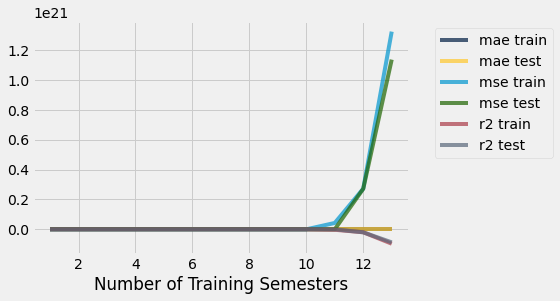

In [15]:
plot_error_score(df, columns, SGDRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.342,1.489,2.806,4.286,0.809,0.727
2,1.479,1.511,3.465,3.266,0.776,0.743
3,1.492,1.498,3.515,3.661,0.769,0.723
4,1.444,1.416,3.303,3.356,0.761,0.73
5,1.407,1.347,3.246,3.005,0.753,0.754
6,1.426,1.461,3.323,3.639,0.746,0.745
7,1.418,1.461,3.361,3.567,0.755,0.745
8,1.414,1.479,3.373,3.735,0.756,0.768
9,1.407,1.445,3.377,3.598,0.757,0.738
10,1.388,1.468,3.316,3.661,0.76,0.734


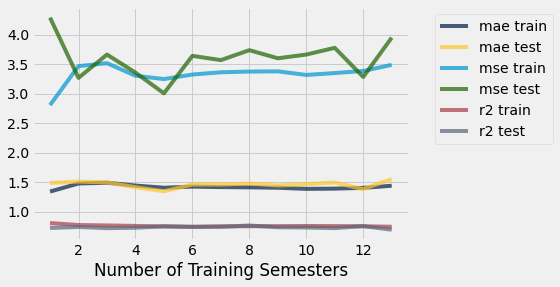

In [16]:
plot_error_score(df, columns, AdaBoostRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,0.53,1.76,0.681,5.918,0.954,0.622
2,0.571,1.283,0.698,2.328,0.955,0.817
3,0.616,1.496,0.833,3.973,0.945,0.7
4,0.542,1.441,0.664,3.739,0.952,0.699
5,0.544,1.241,0.627,3.172,0.952,0.74
6,0.527,1.388,0.601,3.589,0.954,0.749
7,0.52,1.394,0.613,3.528,0.955,0.747
8,0.505,1.47,0.583,3.977,0.958,0.752
9,0.509,1.359,0.59,3.415,0.958,0.751
10,0.499,1.404,0.572,3.495,0.959,0.746


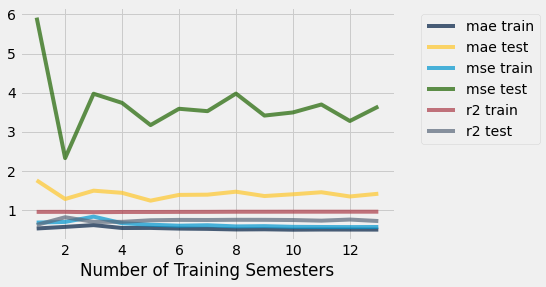

In [17]:
plot_error_score(df, columns, BaggingRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,2.066,2.221,5.827,7.086,0.604,0.548
2,2.055,1.594,5.775,4.043,0.627,0.682
3,2.011,1.812,5.623,4.792,0.63,0.638
4,1.9,1.761,5.223,4.737,0.622,0.619
5,1.859,1.66,5.076,4.283,0.614,0.649
6,1.841,1.984,4.997,5.666,0.619,0.603
7,1.839,1.918,4.985,5.286,0.637,0.622
8,1.865,2.156,5.075,6.588,0.633,0.59
9,1.869,1.873,5.079,5.055,0.635,0.632
10,1.871,1.93,5.099,5.411,0.632,0.607


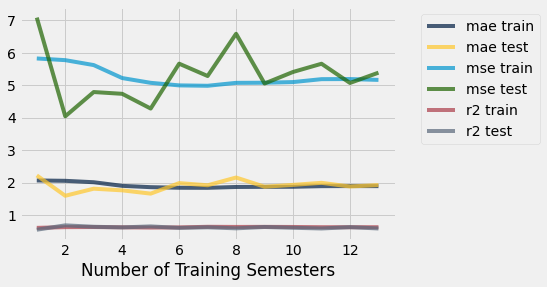

In [18]:
plot_error_score(df, columns, Lasso())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,0.535,1.694,0.561,5.647,0.962,0.64
2,0.548,1.344,0.601,2.655,0.961,0.791
3,0.546,1.486,0.584,3.934,0.962,0.703
4,0.504,1.38,0.501,3.406,0.964,0.726
5,0.506,1.24,0.484,2.866,0.963,0.765
6,0.494,1.329,0.467,3.296,0.964,0.769
7,0.479,1.34,0.455,3.21,0.967,0.77
8,0.469,1.419,0.437,3.699,0.968,0.77
9,0.467,1.31,0.433,3.134,0.969,0.772
10,0.457,1.362,0.419,3.261,0.97,0.763


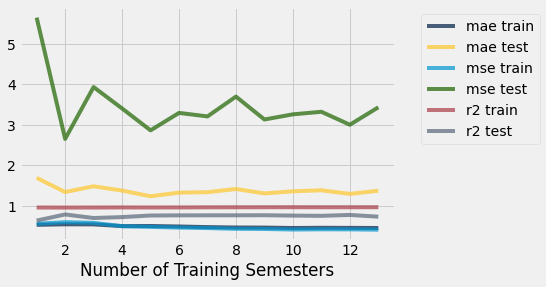

In [19]:
plot_error_score(df, columns, RandomForestRegressor())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.6,1.716,3.781,4.88,0.743,0.689
2,1.541,1.56,3.767,3.543,0.757,0.721
3,1.514,1.644,3.611,4.207,0.763,0.682
4,1.473,1.521,3.417,3.667,0.753,0.705
5,1.475,1.43,3.407,3.057,0.741,0.749
6,1.466,1.521,3.362,3.726,0.743,0.739
7,1.457,1.497,3.358,3.519,0.755,0.748
8,1.469,1.682,3.405,4.234,0.753,0.736
9,1.474,1.485,3.422,3.513,0.754,0.744
10,1.469,1.514,3.41,3.748,0.754,0.728


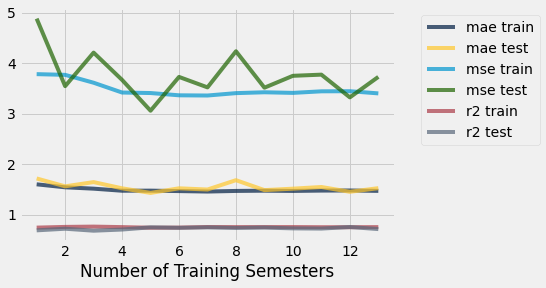

In [20]:
plot_error_score(df, columns, Ridge())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.494,1.961,3.833,6.035,0.739,0.615
2,1.336,1.56,3.353,3.718,0.784,0.708
3,1.299,1.91,3.189,5.808,0.79,0.561
4,1.317,1.553,3.108,3.962,0.775,0.682
5,1.32,1.264,3.05,2.549,0.768,0.791
6,1.304,1.544,2.996,3.891,0.771,0.727
7,1.267,1.414,2.896,3.428,0.789,0.755
8,1.27,1.536,2.929,3.826,0.788,0.762
9,1.269,1.459,2.924,3.526,0.79,0.743
10,1.262,1.43,2.899,3.56,0.791,0.742


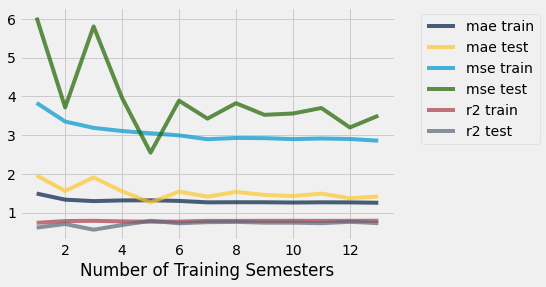

In [21]:
plot_error_score(df, columns, SVR())

Number of Training Semesters,mae train,mae test,mse train,mse test,r2 train,r2 test
1,1.59,2.077,4.513,6.789,0.693,0.567
2,1.399,1.979,3.465,5.699,0.776,0.552
3,1.362,1.822,3.222,5.65,0.788,0.573
4,1.307,1.633,2.927,4.564,0.788,0.633
5,1.252,1.513,2.684,3.986,0.796,0.673
6,1.246,1.672,2.656,4.81,0.797,0.663
7,1.218,1.564,2.606,4.313,0.81,0.691
8,1.199,1.599,2.545,4.384,0.816,0.727
9,1.196,1.575,2.541,4.378,0.817,0.681
10,1.176,1.567,2.486,4.349,0.82,0.684


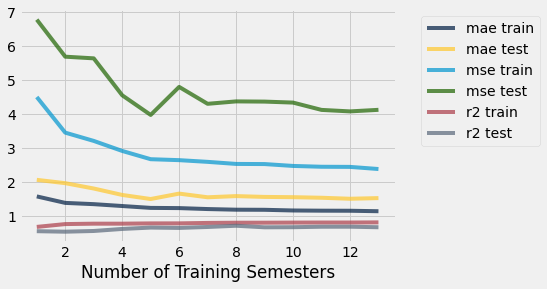

In [22]:
plot_error_score(df, columns, KNeighborsRegressor())